In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from env import user, password, host
import wrangle_zillow

from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
zillow_df = wrangle_zillow.wrangle_zillow_data()

In [6]:
zillow_df.head()

,bedrooms,bathrooms,square_feet,property_tax,house_value,property_description,property_id,lot_size,fips,lot_size_minus_sqft
0,4.0,2.0,1604.0,6089.82,498347.0,Single Family Residential,261.0,6211.0,Los Angeles County,4607.0
1,3.0,3.0,2384.0,6679.55,549917.0,Single Family Residential,261.0,9109.0,Los Angeles County,6725.0
2,3.0,2.0,1574.0,3876.31,235272.0,Single Family Residential,261.0,7538.0,Los Angeles County,5964.0
3,2.0,2.0,1619.0,4206.15,340000.0,Single Family Residential,261.0,111564.0,Los Angeles County,109945.0
4,2.0,3.0,2408.0,24353.42,2017254.0,Single Family Residential,261.0,10497.0,Los Angeles County,8089.0


In [5]:
zillow_df['lot_size_minus_sqft'] = zillow_df['lot_size'] - zillow_df['square_feet']

In [4]:
zillow_df = zillow_df[zillow_df.loc[:]!=0].dropna()

In [23]:
# 12,388 Houses

la_df = zillow_df[zillow_df['fips'] == 'Los Angeles County']
la_df.head()

,bedrooms,bathrooms,square_feet,property_tax,house_value,property_description,property_id,fips
0,4.0,2.0,1604.0,6089.82,498347.0,Single Family Residential,261.0,Los Angeles County
1,3.0,3.0,2384.0,6679.55,549917.0,Single Family Residential,261.0,Los Angeles County
2,3.0,2.0,1574.0,3876.31,235272.0,Single Family Residential,261.0,Los Angeles County
3,2.0,2.0,1619.0,4206.15,340000.0,Single Family Residential,261.0,Los Angeles County
4,2.0,3.0,2408.0,24353.42,2017254.0,Single Family Residential,261.0,Los Angeles County


In [25]:
# 2780 Houses

orange_county_df = zillow_df[zillow_df['fips'] == 'Orange County']
orange_county_df.head()

,bedrooms,bathrooms,square_feet,property_tax,house_value,property_description,property_id,fips
12477,4.0,2.0,1444.0,5822.90,479778.0,Single Family Residential,261.0,Orange County
12478,2.0,2.0,949.0,872.48,50102.0,Single Family Residential,261.0,Orange County
12479,2.0,2.0,1090.0,2953.10,290614.0,Single Family Residential,261.0,Orange County
12480,4.0,3.0,2505.0,9740.22,829744.0,Single Family Residential,261.0,Orange County
12481,5.0,3.5,4958.0,5235.58,465753.0,Single Family Residential,261.0,Orange County


In [26]:
# 788 Houses

ventura_county_df = zillow_df[zillow_df['fips'] == 'Ventura County']
ventura_county_df.head()

,bedrooms,bathrooms,square_feet,property_tax,house_value,property_description,property_id,fips
15273,2.0,1.0,912.0,1489.06,126974.0,Single Family Residential,261.0,Ventura County
15274,3.0,2.0,1054.0,4224.78,358876.0,Single Family Residential,261.0,Ventura County
15275,4.0,3.0,2568.0,8030.60,733940.0,Single Family Residential,261.0,Ventura County
15276,5.0,4.5,3980.0,8650.36,769907.0,Single Family Residential,261.0,Ventura County
15277,3.0,2.5,1698.0,497.84,224593.0,Single Family Residential,261.0,Ventura County


In [27]:
df_la = la_df[['bedrooms', 'bathrooms', 'square_feet', 'house_value']]
X_la = la_df[['bedrooms', 'bathrooms', 'square_feet']]
y_la = la_df[['house_value']]

df_ventura = ventura_county_df[['bedrooms', 'bathrooms', 'square_feet', 'house_value']]
X_ventura = ventura_county_df[['bedrooms', 'bathrooms', 'square_feet']]
y_ventura = ventura_county_df[['house_value']]

df_orange = orange_county_df[['bedrooms', 'bathrooms', 'square_feet', 'house_value']]
X_orange = orange_county_df[['bedrooms', 'bathrooms', 'square_feet']]
y_orange = orange_county_df[['house_value']]

,sqft_per_bedrooms,sqft_per_bathrooms,square_feet,house_value
0,401.000000,802.000000,1604.0,498347.0
1,794.666667,794.666667,2384.0,549917.0
2,524.666667,787.000000,1574.0,235272.0
3,809.500000,809.500000,1619.0,340000.0
4,1204.000000,802.666667,2408.0,2017254.0


In [29]:
import split_scale

In [31]:
train_la, test_la = split_scale.split_my_data(df_la)
train_ventura, test_ventura = split_scale.split_my_data(df_ventura)
train_orange, test_orange = split_scale.split_my_data(df_orange)

In [32]:
scaler_la, train_scaled_la, test_scaled_la = split_scale.standard_scaler(train_la, test_la)
scaler_ventura, train_scaled_ventura, test_scaled_ventura = split_scale.standard_scaler(train_ventura, test_ventura)
scaler_orange, train_scaled_orange, test_scaled_orange = split_scale.standard_scaler(train_orange, test_orange)

In [34]:
X_train_scaled_la = train_scaled_la[['bedrooms', 'bathrooms', 'square_feet']]
y_train_la = train_la[['house_value']]

X_train_scaled_ventura = train_scaled_ventura[['bedrooms', 'bathrooms', 'square_feet']]
y_train_ventura = train_ventura[['house_value']]

X_train_scaled_orange = train_scaled_orange[['bedrooms', 'bathrooms', 'square_feet']]
y_train_orange = train_orange[['house_value']]

In [35]:
X_test_la = test_la.drop(columns='house_value')
y_test_la = test_la[['house_value']]

X_test_ventura = test_ventura.drop(columns='house_value')
y_test_ventura = test_ventura[['house_value']]

X_test_orange = test_orange.drop(columns='house_value')
y_test_orange = test_orange[['house_value']]

In [37]:
# g=sns.PairGrid(df_la[['bedrooms', 'bathrooms', 'square_feet', 'house_value']])
# g.map(sns.regplot)
# plt.show()

(0, 4)

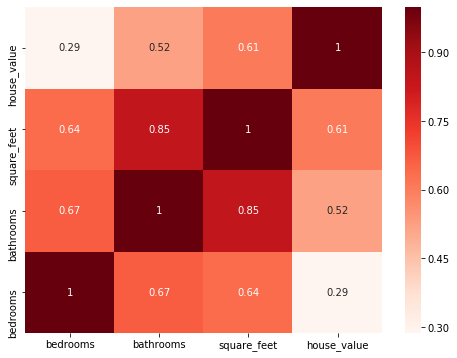

In [38]:
plt.figure(figsize=(8,6))
sns.heatmap(train_scaled_la.corr(), cmap='Reds', annot=True)
plt.ylim(0, 4)

In [52]:
import statsmodels.api as sm

ols_model = sm.OLS(y_train_la, X_train_scaled_la)

res = sm.OLS(y_train_la, X_train_scaled_la).fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            house_value   R-squared (uncentered):                   0.256
Model:                            OLS   Adj. R-squared (uncentered):              0.256
Method:                 Least Squares   F-statistic:                              1135.
Date:                Sun, 20 Oct 2019   Prob (F-statistic):                        0.00
Time:                        14:39:49   Log-Likelihood:                     -1.4664e+05
No. Observations:                9910   AIC:                                  2.933e+05
Df Residuals:                    9907   BIC:                                  2.933e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
bedrooms    -1.211e+05   8885.602    -13.634      0.000   -1.39e+05   -1.04e+05
bathrooms    7.054e+04   1.28e+04      5.523      0.000    4.55e+04    9.56e+04
square_feet   3.86e+05   1.24e+04     31.195      0.000    3.62e+05     4.1e+05
==============================================================================
Omnibus:                    13159.573   Durbin-Watson:                   1.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7233246.253
Skew:                           7.139   Prob(JB):                         0.00
Kurtosis:                     134.581   Cond. No.                         3.99
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

lm1 = LinearRegression()

In [45]:
predictions=pd.DataFrame({'actual':y_train_la.house_value}).reset_index(drop=True)

lm1=LinearRegression()
lm1.fit(X_train_scaled_la[['bedrooms', 'bathrooms', 'square_feet']],y_train_la)
lm1_predictions=lm1.predict(X_train_scaled_la[['bedrooms', 'bathrooms', 'square_feet']])
predictions['lm1']=lm1_predictions

In [46]:
#baseline model
predictions['baseline'] = y_train_la.mean()[0]
predictions.head()

,actual,lm1,baseline
0,166186.0,95493.960056,443250.496771
1,341653.0,168007.046015,443250.496771
2,275972.0,225885.007942,443250.496771
3,345184.0,285163.237375,443250.496771
4,448000.0,608677.434555,443250.496771


In [47]:
lm1_y_intercept = lm1.intercept_
print("intercept: ", lm1_y_intercept)

lm1_coefficients = lm1.coef_
print("coefficients: ", lm1_coefficients)

intercept:  [443250.49677094]
coefficients:  [[-121144.77247989   70535.92487216  385958.65629416]]


In [49]:
y_pred_lm1 = lm1.predict(X_train_scaled_la)
y_pred_lm1

array([[ 95493.96005586],
       [168007.04601488],
       [225885.00794232],
       ...,
       [261675.561523  ],
       [313611.0575128 ],
       [380819.77768384]])

In [58]:
mse_lm1 = mean_squared_error(y_train_la, y_pred_lm1)
print("linear model\n  mean squared error: {:.3}".format(mse_lm1))

linear model
  mean squared error: 2.21e+11


In [59]:
from sklearn.metrics import r2_score
r2 = r2_score(y_train_la, y_pred_lm1)
r2

0.3938159993736463

In [54]:
from math import sqrt
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error

y_pred_baseline = np.array([y_train_la.mean()[0]]*len(y_train_la))
MSE = mean_squared_error(y_train_la, y_pred_baseline)
SSE = MSE*len(y_train_la)
RMSE = sqrt(MSE)

evs = explained_variance_score(y_train_la, y_pred_baseline)

In [56]:
y_train_la = y_train_la.house_value

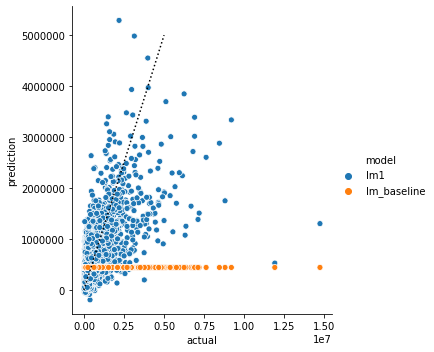

In [57]:
pd.DataFrame({'actual': y_train_la,
              'lm1': y_pred_lm1.ravel(),
              'lm_baseline': y_pred_baseline.ravel()})\
.melt(id_vars=['actual'], var_name='model', value_name='prediction')\
.pipe((sns.relplot, 'data'), x='actual', y='prediction', hue='model')
min = 0
max = 5_000_000
plt.plot([min, max],[min, max], c='black', ls=':')
# plt.ylim(min, max)
# plt.xlim(min, max)
# plt.title('Predicted vs Actual Final Grade')